In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
#Use panda’s read_csv() to import the data

data_url = "https://raw.githubusercontent.com/environmental-data-science" \
            "/eds217_2023/main/data/BSRN_GOB_2019-10.csv"

bsrn = pd.read_csv(data_url)


In [3]:
#2a. Print a list of your DataFrame column names 
bsrn.columns


Index(['DATE', 'H_m', 'SWD_Wm2', 'STD_SWD', 'DIR_Wm2', 'STD_DIR', 'DIF_Wm2',
       'STD_DIF', 'LWD_Wm2', 'STD_LWD', 'SWU_Wm2', 'LWU_Wm2', 'T_degC', 'RH',
       'P_hPa'],
      dtype='object')

In [4]:
#2b How many values are there in the entire data frame 
bsrn.size

669600

In [5]:
#2c. What is the data type of the first col
print(bsrn.iloc[0].info)

<bound method Series.info of DATE       2019-10-01 00:00:00
H_m                          2
SWD_Wm2                   -3.0
STD_SWD                    0.0
DIR_Wm2                    0.0
STD_DIR                    0.0
DIF_Wm2                   -3.0
STD_DIF                    0.0
LWD_Wm2                  300.0
STD_LWD                    0.1
SWU_Wm2                      0
LWU_Wm2                    383
T_degC                    16.2
RH                        30.7
P_hPa                      966
Name: 0, dtype: object>


In [6]:
#3c
bsrn['DATE'] = pd.to_datetime(bsrn['DATE'])

bsrn.DATE.dt.time

bsrn['is_first_observation'] = bsrn.DATE.dt.time == bsrn.DATE.dt.time[0]

In [7]:
#3a
df = bsrn[
    0::1440
][
     ['DATE', 'SWU_Wm2', 'DIR_Wm2', 'DIF_Wm2']
]


In [8]:
#3b
bsrn.iloc[
    ::60 #get every 60th row (every hour on the hour)
    ]['T_degC'] #get this col single brackets to get a series back 

0        16.2
60       18.2
120      18.0
180      17.9
240      18.1
         ... 
44340    27.1
44400    23.6
44460    22.7
44520    22.0
44580    23.1
Name: T_degC, Length: 744, dtype: float64

In [9]:
#3d
bsrn = bsrn.set_index('DATE')

In [10]:
bsrn

,H_m,SWD_Wm2,STD_SWD,DIR_Wm2,STD_DIR,DIF_Wm2,STD_DIF,LWD_Wm2,STD_LWD,SWU_Wm2,LWU_Wm2,T_degC,RH,P_hPa,is_first_observation
DATE,,,,,,,,,,,,,,,
2019-10-01 00:00:00,2,-3.0,0.0,0.0,0.0,-3.0,0.0,300.0,0.1,0,383,16.2,30.7,966,True
2019-10-01 00:01:00,2,-3.0,0.0,0.0,0.0,-3.0,0.0,300.0,0.3,0,383,16.4,30.7,966,False
2019-10-01 00:02:00,2,-3.0,0.0,0.0,0.0,-3.0,0.0,300.0,0.2,0,383,16.5,30.5,966,False
2019-10-01 00:03:00,2,-3.0,0.0,0.0,0.0,-3.0,0.0,300.0,0.1,0,383,16.5,30.4,966,False
2019-10-01 00:04:00,2,-3.0,0.0,0.0,0.0,-3.0,0.0,300.0,0.1,0,383,16.8,30.5,966,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-10-31 23:55:00,2,-2.0,0.0,0.0,0.0,-2.0,0.0,380.0,0.1,0,423,23.0,35.6,964,False
2019-10-31 23:56:00,2,-2.0,0.0,0.0,0.0,-2.0,0.0,380.0,0.1,0,423,23.1,35.5,964,False
2019-10-31 23:57:00,2,-2.0,0.0,0.0,0.0,-2.0,0.0,380.0,0.1,0,423,23.0,35.3,964,False


In [11]:
#4 
bsrn[
    ['SWU_Wm2']
].mean()

SWU_Wm2    110.445004
dtype: float64

In [12]:
#5a
bsrn['Net_SW'] = bsrn.SWD_Wm2 - bsrn.SWU_Wm2

#5b
bsrn['Net_LW'] = bsrn.LWD_Wm2 - bsrn.LWU_Wm2

#5c
bsrn['Net_RAD'] = bsrn['Net_LW'] + bsrn['Net_SW']


In [13]:
daily_rad = []
for d in bsrn.index.day.unique():
    avg_SWD = bsrn.SWD_Wm2[bsrn.index.day == d].mean()
    avg_SWU = bsrn.SWU_Wm2[bsrn.index.day == d].mean()
    # Append the current day and these two values to our list of daily radiation values:
    daily_rad.append([d, avg_SWD, avg_SWU])

daily_SW = pd.DataFrame(daily_rad, columns=['day', 'SW_in', 'SW_out'])


In [14]:
#6
row1 = ['Amazon', 6400, 7050000]
row2 = ['Congo', 4371, 4014500]
row3 = ['Yangtze', 6418, 1808500]
row4 = ['Mississipi', 3730, 3202230]

list_of_list = [row1, row2, row3, row4]

df = pd.DataFrame(list_of_list, columns= ["River", "Length", "Drainage Area"])
df

,River,Length,Drainage Area
0,Amazon,6400,7050000
1,Congo,4371,4014500
2,Yangtze,6418,1808500
3,Mississipi,3730,3202230


In [15]:
#6b
rivers = { 0: 'Zambezi' , 
           1 : 'Mekong',
           2 : 'Murray',
           3 : 'Rhone',
           4 : 'Cubango'
}

length = { 0: 2574,
          1 : 4023,
          2: 2508, 
          3: 813,
          4: 1056          
}

drainage = { 0: 1331,
            1 : 811,
            2 : 1061,
            3 : 980, 
            4 : 530
}

mydict = { 'River' : rivers, 'Length' : length, 'Drainage Area' : drainage}

df3 = pd.DataFrame(mydict)

df3



,River,Length,Drainage Area
0,Zambezi,2574,1331
1,Mekong,4023,811
2,Murray,2508,1061
3,Rhone,813,980
4,Cubango,1056,530


In [16]:
#6c
rivers = pd.concat([df, df3], ignore_index=True)
rivers

,River,Length,Drainage Area
0,Amazon,6400,7050000
1,Congo,4371,4014500
2,Yangtze,6418,1808500
3,Mississipi,3730,3202230
4,Zambezi,2574,1331
5,Mekong,4023,811
6,Murray,2508,1061
7,Rhone,813,980
8,Cubango,1056,530


In [17]:
#6d
df4 = pd.DataFrame([[209000, 'Atlantic Ocean', 'Rio Mantaro', 'South America'], 
                    [41200, 'Atlantic Ocean', 'Lualaba River', 'Africa'],
                    [30166, 'East China Sea', 'Jianggendiru Glacier', 'Asia'],
                    [16792, 'Gulf of Mexico', 'Lake Itasca', 'North America'],
                    [3400, 'Indian Ocean', 'Miombo Woodlands', 'Africa'],
                    [16000, 'South China Sea', 'Lasagongma Spring', 'Asia'],
                    [767, 'Southern Ocean', 'Australian Alps', 'Oceania'],
                    [1710, 'Mediterranean Sea', 'Rhone Glacier', 'Europe'],
                    [475, 'Okavango Delta', 'Bie Plateau', 'Africa']],
                  columns=['discharge_m3s', 'mouth', 'source', 'continent'] )

df4 

,discharge_m3s,mouth,source,continent
0,209000,Atlantic Ocean,Rio Mantaro,South America
1,41200,Atlantic Ocean,Lualaba River,Africa
2,30166,East China Sea,Jianggendiru Glacier,Asia
3,16792,Gulf of Mexico,Lake Itasca,North America
4,3400,Indian Ocean,Miombo Woodlands,Africa
5,16000,South China Sea,Lasagongma Spring,Asia
6,767,Southern Ocean,Australian Alps,Oceania
7,1710,Mediterranean Sea,Rhone Glacier,Europe
8,475,Okavango Delta,Bie Plateau,Africa


In [20]:
rivers1 = pd.concat([rivers, df4], axis = 1 ) #Axis = 1 adds columns instead of adding length
rivers1

,River,Length,Drainage Area,discharge_m3s,mouth,source,continent
0,Amazon,6400,7050000,209000,Atlantic Ocean,Rio Mantaro,South America
1,Congo,4371,4014500,41200,Atlantic Ocean,Lualaba River,Africa
2,Yangtze,6418,1808500,30166,East China Sea,Jianggendiru Glacier,Asia
3,Mississipi,3730,3202230,16792,Gulf of Mexico,Lake Itasca,North America
4,Zambezi,2574,1331,3400,Indian Ocean,Miombo Woodlands,Africa
5,Mekong,4023,811,16000,South China Sea,Lasagongma Spring,Asia
6,Murray,2508,1061,767,Southern Ocean,Australian Alps,Oceania
7,Rhone,813,980,1710,Mediterranean Sea,Rhone Glacier,Europe
8,Cubango,1056,530,475,Okavango Delta,Bie Plateau,Africa


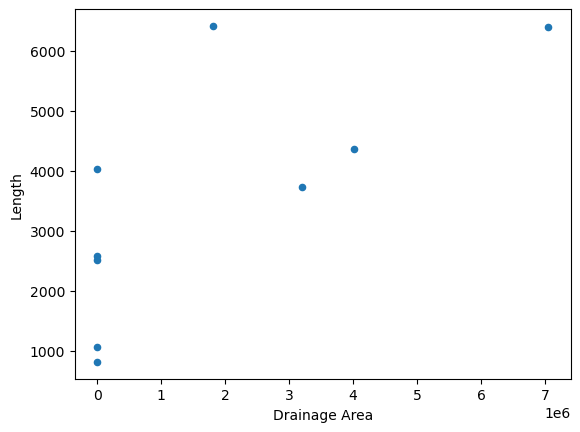

In [28]:
stplot = rivers1.plot.scatter(y = 'Length', x = 'Drainage Area')

In [31]:
#8
rivers1.to_csv('rivers1.csv')

